# 第6章 逻辑斯谛回归

逻辑斯谛回归(LR)是经典的分类方法

1．逻辑斯谛回归模型是由以下条件概率分布表示的分类模型。逻辑斯谛回归模型可以用于二类或多类分类。

$$P(Y=k | x)=\frac{\exp \left(w_{k} \cdot x\right)}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}, \quad k=1,2, \cdots, K-1$$

$$P(Y=K | x)=\frac{1}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}$$
这里，$x$为输入特征$(x^{1}, x^{(2)}, \dots, x^{(n)}, 1)^T$，$w$为特征的权值$(w^{1}, w^{(2)}, \dots, w^{(n)}, b)^T$。  
softmax
$$
P(Y=k|x)=\frac{\exp(w_k\cdot x)}{\sum_{k=1}^K\exp(w_k\cdot x)}, k=1,2,\dots,K
$$

事件的几率(odds)是指事件发生的概率(p)与该事件不发生的概率(1-p)的比值. 事件的对数几率(log odds)或logit函数是:
$$logit(p) = log\frac p {1-p}$$
考虑二类分类问题:
$$logit\frac {P(Y=1|x)}{1-P(Y=1|x)} = log(exp(w \cdot x)) = w \cdot x$$
**输出$Y=1$的对数几率是由输入x的线性函数表示的模型, 即逻辑斯蒂回归模型**

逻辑斯谛回归模型源自逻辑斯谛分布，其分布函数$F(x)$是$S$形函数。逻辑斯谛回归模型是由输入的线性函数表示的输出的对数几率模型。

2．最大熵模型是由以下条件概率分布表示的分类模型。最大熵模型也可以用于二类或多类分类。

$$P_{w}(y | x)=\frac{1}{Z_{w}(x)} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$
$$Z_{w}(x)=\sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$

其中，$Z_w(x)$是规范化因子，$f_i$为特征函数，$w_i$为特征的权值。

3．最大熵模型可以由最大熵原理推导得出。最大熵原理是概率模型学习或估计的一个准则。最大熵原理认为在所有可能的概率模型（分布）的集合中，熵最大的模型是最好的模型。

最大熵原理应用到分类模型的学习中，有以下约束最优化问题：

$$\min -H(P)=\sum_{x, y} \tilde{P}(x) P(y | x) \log P(y | x)$$

$$s.t.  \quad P\left(f_{i}\right)-\tilde{P}\left(f_{i}\right)=0, \quad i=1,2, \cdots, n$$
 
 $$\sum_{y} P(y | x)=1$$

 
求解此最优化问题的对偶问题得到最大熵模型。


4．逻辑斯谛回归模型与最大熵模型都属于对数线性模型。

5．逻辑斯谛回归模型及最大熵模型学习一般采用极大似然估计，或正则化的极大似然估计。逻辑斯谛回归模型及最大熵模型学习可以形式化为无约束最优化问题。求解该最优化问题的算法有改进的迭代尺度法、梯度下降法、拟牛顿法。


6.书中没有直接给出LR的损失函数，在[CH12](../../第12章%20监督学习方法总结/12.Summary_of_Supervised_Learning_Methods.ipynb)中有提到LR的损失函数是**逻辑斯谛损失函数**。如果采用损失函数上界的那类分析方法，定义$\mathcal{Y}=\{+1,-1\}$， 有$\log_2(1+\exp(-yf(x)))=\log_2(1+\exp(-y(w\cdot x)))$



回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w^{(0)}\cdot x^{(0)} + w^{(1)}\cdot x^{(1)} + w^{(2)}\cdot x^{(2)} +...+w^{(n)}\cdot x^{(n)},(x^{(0)}=1)$


**逻辑思谛分布(logistic distribution)**   
分布函数:
$$F(x)=P(X \leq x) = \frac 1 {1+e^{-(x-\mu)/\gamma}}$$
是一条S形曲线(sigmoid curve), 以$(\mu, \frac 1 2)$为对称中心  
密度函数:
$$f(x) = F'(x) = \frac {e^{-(x-\mu)/\gamma}} {\gamma(1+e^{-(x-\mu)/\gamma)^2}}$$

**逻辑斯蒂模型参数估计**

似然函数:
$$
\prod\limits_{i=1}\limits^NP(y_i|x_i,W)=\prod\limits_{i=1}\limits^N\frac{(\exp(w\cdot x_i))^{y_i}}{1+\exp(w\cdot x_i)}
$$
使用对数技巧
$$
\sum_{i=1}^N\log\frac{(\exp(w\cdot x_i))^{y_i}}{1+\exp(w\cdot x_i)}=\sum_{i=1}^N[y_i(w\cdot x_i)-\log(1+\exp(w\cdot x_i)) ]
$$

In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

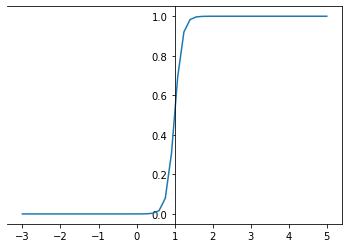

In [2]:
# sigmoid 函数
x = np.linspace(-3, 5, 50)
mu, gamma = 1, 0.1  # gamma 越小 曲线在中心增长越快
y = 1 / (1+ np.exp(-(x-mu)/gamma))
plt.plot(x, y)
ax = plt.gca()
ax.spines['left'].set_position(('data', 1))

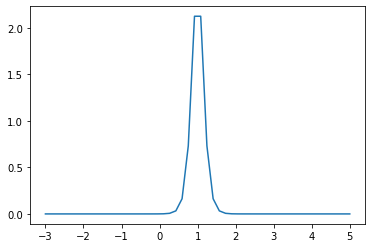

In [3]:
temp = np.exp(-(x-mu)/gamma)
pdf = temp / (gamma * (1 + temp)**2)
plt.plot(x, pdf)

In [4]:
x = np.array([0, 0, 0]).reshape(3,1)
y = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
np.concatenate((y, x), axis=1)
np.ones(3)[:, np.newaxis]
x

array([[0],
       [0],
       [0]])

In [5]:
np.linalg.norm([1, 2, 3])

3.7416573867739413

In [6]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    # print(data)
    return data[:,:-1], data[:,-1]

In [7]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.001, epsilon=0.0001):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.eplison_ = epsilon  # 收敛条件
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def data_matrix(self, X):
        data_mat = np.ones((len(X), 1))
        return np.concatenate((data_mat, X), axis=1)

    def fit_1(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))
    def fit(self, X, y):
        y = y[:, np.newaxis]
        self.weights = self.grandient_descent(X, y, self.eplison_, self.max_iter)
    
    def grandient_descent(self, X, y, eplison_=0.00001, n_iter=1500):
        X = self.data_matrix(X)  # m*n
        weights = np.zeros((len(X[0]), 1), dtype=np.float32)
        for k in range(n_iter):
            g_k = self.grand_(X, y, weights)  # 第k次迭代的梯度值
            if np.linalg.norm(g_k) < eplison_:
                break
            else:
                p_k = -g_k  # 与梯度相同方向  极大似然
            lambda_k = self.learning_rate  # TODO: 更新算法
            weights += lambda_k*p_k
        return weights

    def grand_(self, X, y, w):
        error = y-self.sigmoid(np.dot(X, w))
        rst = np.dot(X.T, error)
        return rst

    def predict(self, x):
        # x: (n_sample, n_feature) 
        x = self.data_matrix(x)
        result = -np.dot(x, self.weights)
        return np.where(result>=0, 1, 0)
    
    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [9]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit_1(X_train, y_train)

LogisticRegression Model(learning_rate=0.001,max_iter=200)


In [10]:
lr_clf.score(X_test, y_test)

1.0

In [11]:
lr_clf.weights

array([[-0.2065968],
       [ 1.1560543],
       [-1.940044 ]], dtype=float32)

In [12]:
lr_clf.predict([[4.5, 3.1], [5.1, 2.4]])

array([[1],
       [0]])

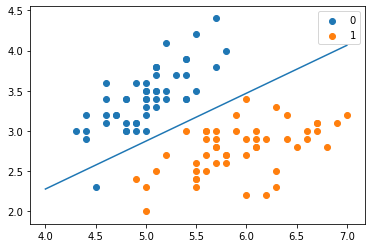

In [13]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

### scikit-learn实例

#### sklearn.linear_model.LogisticRegression

solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
- a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
- b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
- e) saga: 是 sag 的一类变体，它支持非平滑（non-smooth）的 L1 正则选项 penalty="l1" 。因此对于稀疏多项式 logistic 回归 ，往往选用该求解器。saga求解器是唯一支持弹性网络正则选项的求解器

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(max_iter=200, solver='lbfgs')

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
print(clf.coef_, clf.intercept_)

In [ ]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 最大熵模型

**例6.2 python符号推导实现**  
一个约束条件

In [ ]:
from sympy import *

# 1 constrains
P1, P2, P3, P4, P5, w0, w1, w2 = symbols("P1, P2, P3, P4, P5, w0, w1, w2", real=True)
L = P1 * log(P1) + P2 * log(P2) + P3 * log(P3) + P4 * log(P4) + P5 * log(P5) + \
    w0 * (P1 + P2 + P3 + P4 + P5 - 1)   # 拉格朗日函数
# 拉格朗日函数对原变量P求导,并令导数=0 解方程得到P
P1_e = (solve(diff(L, P1), P1))[0]  # 解是list, 用参数表示原变量
P2_e = (solve(diff(L, P2), P2))[0]
P3_e = (solve(diff(L, P3), P3))[0]
P4_e = (solve(diff(L, P4), P4))[0]
P5_e = (solve(diff(L, P5), P5))[0]
P1_e, P2_e, P3_e, P4_e, P5_e

In [ ]:
L = L.subs({P1: P1_e, P2: P2_e, P3: P3_e, P4: P4_e, P5: P5_e})  # 用参数取代原变量带入 L
L

In [ ]:
w = (solve([diff(L, w0)], [w0]))[0]  # 对参数w0 求导 解方程
w

In [ ]:
P = [P1_e.subs({w0: w[0]}),
     P2_e.subs({w0: w[0]}),
     P3_e.subs({w0: w[0]}),
     P4_e.subs({w0: w[0]}),
     P5_e.subs({w0: w[0]})]
P

两个约束条件

In [ ]:
P1, P2, P3, P4, P5, w0, w1, w2 = symbols("P1, P2, P3, P4, P5, w0, w1, w2", real=True)
L = P1 * log(P1) + P2 * log(P2) + P3 * log(P3) + P4 * log(P4) + P5 * log(P5) + \
    w0 * (P1 + P2 + P3 + P4 + P5 - 1) + w1 * (P1 + P2 - 3/10)   # 拉格朗日函数
P1_e = (solve(L.diff(P1), P1))[0]
P2_e = (solve(L.diff(P2), P2))[0]
P3_e = (solve(L.diff(P3), P3))[0]
P4_e = (solve(L.diff(P4), P4))[0]
P5_e = (solve(L.diff(P5), P5))[0]
L = L.subs({P1: P1_e, P2: P2_e, P3: P3_e, P4: P4_e, P5: P5_e})  # 用参数取代原变量带入 L
w = (solve([diff(L, w0), L.diff(w1)], [w0, w1]))[0]  # 对参数w0 求导 解方程
P = [P1_e.subs({w0: w[0], w1:w[1]}),
     P2_e.subs({w0: w[0], w1:w[1]}),
     P3_e.subs({w0: w[0], w1:w[1]}),
     P4_e.subs({w0: w[0], w1:w[1]}),
     P5_e.subs({w0: w[0], w1:w[1]})]
P

In [ ]:
import math
from copy import deepcopy

In [ ]:
class MaxEntropy:  # 使用改进的迭代尺度法  IIS
    def __init__(self, EPS=0.005):
        self._samples = []
        self._Y = set()  # 标签集合，相当去去重后的y
        self._numXY = {}  # key为(x,y)，value为出现次数
        self._N = 0  # 样本数
        self._Ep_ = []  # 样本分布的特征期望值
        self._xyID = {}  # key记录(x,y),value记录id号
        self._n = 0  # 特征键值(x,y)的个数
        self._C = 0  # 最大特征数
        self._IDxy = {}  # key为(x,y)，value为对应的id号
        self._w = []
        self._EPS = EPS  # 收敛条件
        self._lastw = []  # 上一次w参数值

    def loadData(self, dataset):
        self._samples = deepcopy(dataset)
        for items in self._samples:
            y = items[0]
            X = items[1:]
            self._Y.add(y)  # 集合中y若已存在则会自动忽略
            for x in X:
                if (x, y) in self._numXY:
                    self._numXY[(x, y)] += 1
                else:
                    self._numXY[(x, y)] = 1

        self._N = len(self._samples)
        self._n = len(self._numXY)
        # M = f^#(x, y) = \sum f_i(x, y)
        self._C = max([len(sample) - 1 for sample in self._samples])
        self._w = [0] * self._n
        self._lastw = self._w[:]

        self._Ep_ = [0] * self._n
        for i, xy in enumerate(self._numXY):  # 计算特征函数fi关于经验分布的期望
            self._Ep_[i] = self._numXY[xy] / self._N
            self._xyID[xy] = i
            self._IDxy[i] = xy

    def _Zx(self, X):  # 计算每个Z(x)值
        zx = 0
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            zx += math.exp(ss)
        return zx

    def _model_pyx(self, y, X):  # 计算每个P(y|x)
        zx = self._Zx(X)
        ss = 0
        for x in X:
            if (x, y) in self._numXY:
                ss += self._w[self._xyID[(x, y)]]
        pyx = math.exp(ss) / zx
        return pyx

    def _model_ep(self, index):  # 计算特征函数fi关于模型P(Y|X)的期望 E_p(f_i)
        x, y = self._IDxy[index]
        ep = 0
        for sample in self._samples:
            if x not in sample:
                continue
            pyx = self._model_pyx(y, sample)
            ep += pyx / self._N
        return ep

    def _convergence(self):  # 判断是否全部收敛
        for last, now in zip(self._lastw, self._w):
            if abs(last - now) >= self._EPS:
                return False
        return True

    def predict(self, X):  # 计算预测概率
        Z = self._Zx(X)
        print(Z)
        result = {}
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            pyx = math.exp(ss) / Z
            result[y] = pyx
        return result

    def train(self, maxiter=1000):  # 训练数据
        for loop in range(maxiter):  # 最大训练次数
            # print("iter:%d" % loop)
            self._lastw = self._w[:]
            for i in range(self._n):
                ep = self._model_ep(i)  # 计算第i个特征的模型期望
                print(self._Ep_[i], ep)
                self._w[i] += math.log(self._Ep_[i] / ep) / self._C  # 更新参数
            print("w:", self._w)
            if self._convergence():  # 判断是否收敛
                break

特征函数1
$$
f_1(x, y) = \begin{cases} 1, x^{(0)}=sunny且 y=no \\ 0, otherwise
\end{cases}$$
出现次数3次
特征函数f(x,y)关于经验分布$\widetilde P (X, Y)$的期望值:
$$E_{\widetilde P}(f_1) = \sum\limits_{x,y}\widetilde P(x,y)f_1(x,y) = \frac 3 {14}$$
可以得到19个特征函数

$E_P(f_i) =\sum\limits_{x,y}{\widetilde P(x)P_w(y|x)f_i(x,y)} =\sum\limits_x \widetilde P(x)\frac{1}{Z_{w}(x)} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right) f_i(x,y)$ 

$w_i \leftarrow w_i + \delta_i$

$\delta_i = \frac 1 M log \frac {E_{\widetilde P}(f_i)}{E_P(f_i)}$

In [ ]:
dataset = [['no', 'sunny', 'hot', 'high', 'FALSE'],
           ['no', 'sunny', 'hot', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'high', 'FALSE'],
           ['yes', 'rainy', 'mild', 'high', 'FALSE'],
           ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
           ['no', 'rainy', 'cool', 'normal', 'TRUE'],
           ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
           ['no', 'sunny', 'mild', 'high', 'FALSE'],
           ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
           ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
           ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
           ['yes', 'overcast', 'mild', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
           ['no', 'rainy', 'mild', 'high', 'TRUE']]

In [ ]:
maxent = MaxEntropy()
x = ['overcast', 'mild', 'high', 'FALSE']

In [ ]:
maxent.loadData(dataset)
maxent.train()

In [ ]:
maxent._numXY

In [ ]:
 maxent._Ep_

In [ ]:
maxent._C

In [ ]:
print('predict:', maxent.predict(x))

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)